<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/DeepLearning_Task_2_Week_1_Classification_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 848.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Data Exploring

In [ ]:
url =  "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv"
df = pd.read_csv(url)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
df['income'] = df['income'].apply(lambda x: 1.0 if x == '>50K' else 0.0)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df = df.astype(float)
X = df.drop('income', axis=1)
y = df['income']

# Data preparation

In [ ]:
print(df['income'].value_counts())

income
0.0    41001
1.0     7841
Name: count, dtype: int64


data oversampling ke negatif, dan undersampling ke positif

In [ ]:
#gunakan smote untuk menambal sample ke minoritas(positif)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pytorch

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

## Modeling Neural Network

In [ ]:
class Net(nn.Module):
    def __init__(self,input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return self.sigmoid(x)

input_size = X_train.shape[1]
model_pytorch = Net(input_size)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

## Training Model

In [ ]:
epochs = 10
for epoch in range(epochs):
    model_pytorch.train()
    optimizer.zero_grad()
    outputs = model_pytorch(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    model_pytorch.eval()
    with torch.no_grad():
      val_out = model_pytorch(X_test_tensor)
      val_loss = criterion(val_out, y_test_tensor)
    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

Epoch 1, Loss: 0.25808945298194885, Val Loss: 0.25361040234565735
Epoch 2, Loss: 0.25384020805358887, Val Loss: 0.24959421157836914
Epoch 3, Loss: 0.24987250566482544, Val Loss: 0.24580760300159454
Epoch 4, Loss: 0.24627277255058289, Val Loss: 0.2422047108411789
Epoch 5, Loss: 0.24269555509090424, Val Loss: 0.23872800171375275
Epoch 6, Loss: 0.23935000598430634, Val Loss: 0.23533661663532257
Epoch 7, Loss: 0.23606978356838226, Val Loss: 0.23199129104614258
Epoch 8, Loss: 0.23271575570106506, Val Loss: 0.2286577820777893
Epoch 9, Loss: 0.22947785258293152, Val Loss: 0.22530725598335266
Epoch 10, Loss: 0.2262800931930542, Val Loss: 0.22192226350307465


In [ ]:
model_pytorch.eval()
with torch.no_grad():
    y_pred_pytorch = model_pytorch(X_test_tensor).numpy()
    y_pred = (y_pred_pytorch > 0.5).astype(int)

In [ ]:
accuracy_pytorch = accuracy_score(y_test_tensor, y_pred)

akurasi untuk proporsi prediksi yang benar terhadap total data

akurasi = (True Positif + True Negatif) / (True Positif + True Negatif + False Positif + False Negatif)

In [ ]:
precision_pytorch = precision_score(y_test_tensor, y_pred)

presisi digunakan untuk prediksi positif yang benar terhadap total prediksi positif

presisi = True Positif/(True Positif+False Positif)

In [ ]:
recall_pytorch = recall_score(y_test_tensor, y_pred)

Recall digunakan untuk prediksi positif yang benar terhadap total data positif

Recall True Positif/(True Positif+False Negatif)

In [ ]:
f1_pytorch = f1_score(y_test_tensor, y_pred)

F1 digunakan untuk rata rata dari presisi dan recall

F1 = 2 * ((Presisi * Recall)/(Presisi + Recall))

In [ ]:
auc_pytorch = roc_auc_score(y_test_tensor, y_pred)

ROC dan AUC untuk mengevaluasi kinerja model klasifikasi biner. ROC adalah grafik, sedangkan AUC adalah nilai yang menggambarkan kinerja model.

In [ ]:
fpr_pytorch, tpr_pytorch, _ = roc_curve(y_test_tensor, y_pred_pytorch)
print(f'Akurasi: {accuracy_pytorch}\nPresisi: {precision_pytorch}\nRecall: {recall_pytorch}\nF1-Score: {f1_pytorch}\nAUC: {auc_pytorch}')

Akurasi: 0.7383696116090482
Presisi: 0.7293991925908335
Recall: 0.7532801961986512
F1-Score: 0.7411473728660192
AUC: 0.7384518856326752


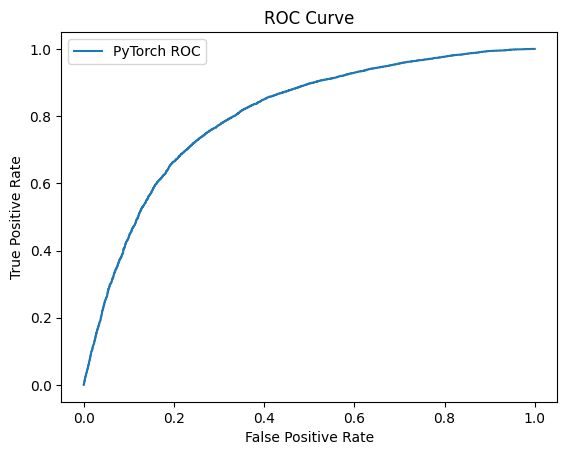

In [ ]:
plt.figure()
plt.plot(fpr_pytorch, tpr_pytorch, label='PyTorch ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Tensorflow

## Modeling Neural Network

In [ ]:
model_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# menggunakan early stopping untuk mengurangi overfitting pada model
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

## Training Model

In [ ]:
history = model_tf.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.2887 - val_accuracy: 0.8549 - val_loss: 0.3077
Epoch 2/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8683 - loss: 0.2883 - val_accuracy: 0.8501 - val_loss: 0.3148
Epoch 3/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8674 - loss: 0.2852 - val_accuracy: 0.8560 - val_loss: 0.3048
Epoch 4/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8694 - loss: 0.2790 - val_accuracy: 0.8529 - val_loss: 0.3036
Epoch 5/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8710 - loss: 0.2783 - val_accuracy: 0.8595 - val_loss: 0.3012
Epoch 6/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8736 - loss: 0.2728 - val_accuracy: 0.8575 - val_loss: 0.2972
Epoch 7/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.2687 - val_accuracy: 0.8634 - val_loss: 0.2919
Epoch 8/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8753 - loss: 0.2661 

In [ ]:
y_pred_prob_tf = model_tf.predict(X_test).flatten()
y_pred_tf = (y_pred_prob_tf > 0.5).astype(int)

513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
accuracy_tf = accuracy_score(y_test, y_pred_tf)

akurasi untuk proporsi prediksi yang benar terhadap total data

akurasi = (True Positif + True Negatif) / (True Positif + True Negatif + False Positif + False Negatif)

In [ ]:
precision_tf = precision_score(y_test, y_pred_tf)

presisi digunakan untuk prediksi positif yang benar terhadap total prediksi positif

presisi = True Positif/(True Positif+False Positif)

In [ ]:
recall_tf = recall_score(y_test, y_pred_tf)

Recall digunakan untuk prediksi positif yang benar terhadap total data positif

Recall True Positif/(True Positif+False Negatif)

In [ ]:
f1_tf = f1_score(y_test, y_pred_tf)

F1 digunakan untuk rata rata dari presisi dan recall

F1 = 2 * ((Presisi * Recall)/(Presisi + Recall))

In [ ]:
roc_auc_tf = roc_auc_score(y_test, y_pred_prob_tf)

ROC dan AUC untuk mengevaluasi kinerja model klasifikasi biner. ROC adalah grafik, sedangkan AUC adalah nilai yang menggambarkan kinerja model.

In [ ]:
fpr_tensorflow, tpr_tensorflow, _ = roc_curve(y_test, y_pred_prob_tf)
print(f'Akurasi: {accuracy_tf}\nPresisi: {precision_tf}\nRecall: {recall_tf}\nF1-Score: {f1_tf}\nAUC: {roc_auc_tf}')

Akurasi: 0.8719590268886044
Presisi: 0.8694325808419768
Recall: 0.8736971183323115
F1-Score: 0.8715596330275229
AUC: 0.9518032413166378


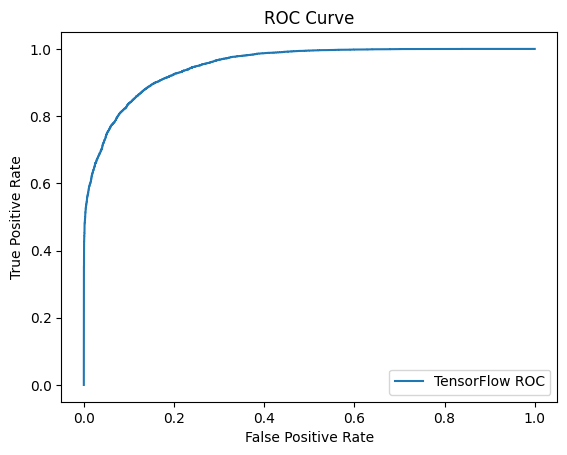

In [ ]:
plt.figure()
plt.plot(fpr_tensorflow, tpr_tensorflow, label='TensorFlow ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Matriks Evaluasi yang terbaik untuk klasifikasi adalah F1_score dan AUC karena dataset tidak seimbang (oversamping ke negatif)